In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import pandas as pd
import seaborn as sns
import scipy.stats as stats

In [2]:
from sklearn.preprocessing import OneHotEncoder


def barplot(input_df, metric_list):
    # Calcular el número de filas necesarias para las subgráficas (en este caso 3 columnas por fila)
    n_rows = int(np.ceil(len(metric_list) / 3))
    n_cols = 3
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))
    
    # Aplanar el arreglo de ejes para poder iterar fácilmente
    axes = axes.flatten()
    
    # Crear gráficos de barras por cada columna en metric_list
    for i, col in enumerate(metric_list):
        ax = axes[i]  # Seleccionar el eje correspondiente
        class_counts = input_df[col].value_counts()  # Contar las ocurrencias de cada categoría
        ax.bar(class_counts.index, class_counts.values, color='skyblue')  # Crear gráfico de barras
        ax.set_title(f'Número de Registros por {col}')  # Título del gráfico
        ax.set_xlabel(col)  # Etiqueta del eje X
        ax.set_ylabel('Número de Registros')  # Etiqueta del eje Y
    
    # Eliminar los gráficos sobrantes si hay menos columnas que subgráficas
    for j in range(len(metric_list), len(axes)):
        fig.delaxes(axes[j])
    
    # Ajustar el diseño para que no se solapen las gráficas
    plt.tight_layout()
    plt.show()


def apply_one_hot_encoder(input_df, variable_list):
    # Crear el OneHotEncoder
    encoder = OneHotEncoder(sparse=False)

    # Aplicar OneHotEncoder a las columnas seleccionadas
    encoded_data = encoder.fit_transform(input_df[variable_list])

    # Convertir el resultado a un DataFrame con el índice original
    encoded_df = pd.DataFrame(encoded_data, 
                              columns=encoder.get_feature_names_out(variable_list), 
                              index=input_df.index)

    # Concatenar las columnas codificadas al DataFrame original
    input_encoded_df = pd.concat([input_df.drop(columns=variable_list), encoded_df], axis=1)
    
    return input_encoded_df


def fill_nulls_with_value(input_df, variable_list, value):
    output_df = input_df.copy()
    output_df[variable_list] = output_df[variable_list].fillna(value)
    return output_df

def fill_nulls_with_metric(input_df, variable_list, metric):
    output_df = input_df.copy()
    
    # Diccionario para mapear las métricas a funciones pandas
    metric_functions = {
        'mean': lambda x: x.mean(),
        'median': lambda x: x.median(),
        'max': lambda x: x.max(),
        'min': lambda x: x.min(),
    }

    # Verificar si la métrica proporcionada es válida
    if metric not in metric_functions:
        raise ValueError(f"Métrica '{metric}' no es válida. Usa: {list(metric_functions.keys())}")

    # Iterar sobre las columnas de la lista y rellenar los nulos
    for column in variable_list:
        if column in output_df.columns:
            fill_value = metric_functions[metric](output_df[column])  # Calcular el valor de la métrica
            output_df[column] = output_df[column].fillna(fill_value)  # Rellenar valores nulos
        else:
            print(f"Columna '{column}' no encontrada en el DataFrame.")

    return output_df

def plot_histograms(dataset, variables, bins=10):
    n_vars = len(variables)
    n_cols = 3
    n_rows = (n_vars // n_cols) + (n_vars % n_cols > 0)

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 4))
    axes = axes.flatten()
    
    for i, var in enumerate(variables):
        axes[i].hist(dataset[var].dropna(), bins=bins, alpha=0.7, color='blue')
        axes[i].set_title(var)
    
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.show()
    
def plot_correlation_heatmap(df, method = None):
    if method is None:
        # Calculamos la matriz de correlación entre las variables numéricas
        corr_matrix = df.corr()
    else:
        corr_matrix = df.corr(method = method)
    # Dibujamos el heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt='.2f', linewidths=0.5, cbar=True)
    plt.title('Correlación entre las Variables')
    plt.show()


In [3]:
ice_df = pd.read_csv('Ice_cream selling data.csv',index_col=0)

In [4]:
ice_df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 49 entries, -4.662262677220208 to 4.899031513688672
Data columns (total 1 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Ice Cream Sales (units)  49 non-null     float64
dtypes: float64(1)
memory usage: 784.0 bytes


In [5]:
ice_df.head()

,Ice Cream Sales (units)
Temperature (°C),
-4.662263,41.842986
-4.316559,34.661120
-4.213985,39.383001
-3.949661,37.539845
-3.578554,32.284531


In [6]:
ice_df.describe()

,Ice Cream Sales (units)
count,49.000000
mean,15.905308
std,12.264682
min,0.328626
25%,4.857988
50%,12.615181
75%,25.142082
max,41.842986


array([[<Axes: title={'center': 'Ice Cream Sales (units)'}>]],
      dtype=object)

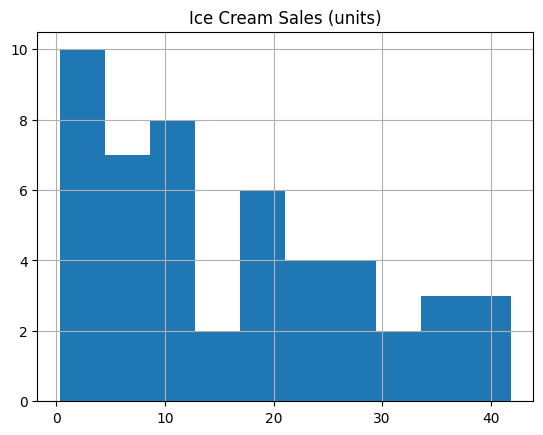

In [7]:
ice_df.hist(bins=10)

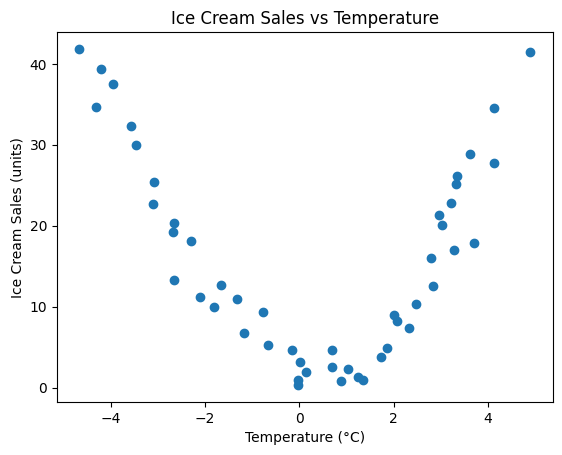

In [8]:

plt.scatter(x=ice_df.index, y=ice_df['Ice Cream Sales (units)'])
plt.xlabel('Temperature (°C)')
plt.ylabel('Ice Cream Sales (units)')
plt.title('Ice Cream Sales vs Temperature')
plt.show()

In [9]:
# Correlación de Pearson
pearson_r = stats.pearsonr(x=ice_df.index, y=ice_df['Ice Cream Sales (units)'])
print(f"Pearson correlation: {pearson_r[0]}")

# Correlación de Spearman
spearman_rho = stats.spearmanr(ice_df.index, ice_df['Ice Cream Sales (units)'])
print(f"Spearman correlation: {spearman_rho[0]}")

Pearson correlation: -0.17518429270784355
Spearman correlation: -0.08499999999999998


In [10]:
# Definir X (Temperatura) y y (Ventas de Helado)
X = np.array(ice_df.index).reshape(-1, 1)  # Temperatura en el índice
y = ice_df['Ice Cream Sales (units)']

# Ajustar el modelo de regresión lineal
reg = LinearRegression().fit(X, y)

# Obtener métricas del modelo
r2 = reg.score(X, y)  # R^2
coef = reg.coef_[0]  # Coeficiente de la regresión
intercepto = reg.intercept_  # Intercepto

print(f"R²: {r2}")
print(f"Coeficiente: {coef}")
print(f"Intercepto: {intercepto}")

R²: 0.030689536411547258
Coeficiente: -0.7964571107159999
Intercepto: 16.121749391993667


In [11]:
print(f"Coeficiente de la recta {coef}")
print(f"Intercepto de la recta {intercepto}")

Coeficiente de la recta -0.7964571107159999
Intercepto de la recta 16.121749391993667


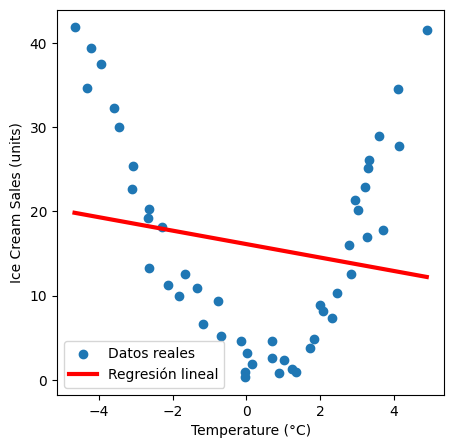

In [12]:
# Obtener valores modelo

# Crear la figura y los ejes
fig = plt.figure(figsize=(5,5))
plt.scatter(X, y, label="Datos reales")  # Representar puntos de datos

# Obtener valores predichos
y_pred = reg.predict(X)

# Representar la recta de regresión
plt.plot(X, y_pred, color='red', linewidth=3, label="Regresión lineal")

# Etiquetas de ejes
plt.xlabel("Temperature (°C)")
plt.ylabel("Ice Cream Sales (units)")

# Agregar leyenda
plt.legend()

# Mostrar gráfico
plt.show()

Temperature (°C)
-4.662263    22.007945
-4.316559    15.101416
-4.213985    19.904993
-3.949661    18.272360
-3.578554    13.312617
-3.455712    11.127063
-3.108440     4.037913
-3.081303     6.789147
-2.672461     0.976720
-2.652287     2.045497
-2.651498    -4.957725
-2.288264     0.179738
-2.111870    -6.585469
-1.818938    -7.557587
-1.660348    -4.828964
-1.326379    -6.220422
-1.173123   -10.366969
-0.773330    -7.344705
-0.673753   -11.448202
-0.149635   -11.567285
-0.036156   -15.821921
-0.033895   -15.251142
 0.008608   -12.949294
 0.149245   -14.071466
 0.688781   -12.996383
 0.693599   -10.943638
 0.874905   -14.634951
 1.024181   -12.992227
 1.240712   -13.841215
 1.359813   -14.085602
 1.740000   -10.953344
 1.850552    -9.789876
 1.999310    -5.585561
 2.075101    -6.298286
 2.318591    -6.862997
 2.471946    -3.816320
 2.784836     2.092873
 2.831760    -1.298136
 2.959932     7.578625
 3.020874     6.398661
 3.211366     9.275372
 3.270044     3.465979
 3.316073    11.6

(array([11.,  7.,  7.,  5.,  4.,  4.,  6.,  2.,  2.,  1.]),
 array([-15.82192097, -11.31023477,  -6.79854857,  -2.28686237,
          2.22482383,   6.73651003,  11.24819623,  15.75988243,
         20.27156863,  24.78325483,  29.29494104]),
 <BarContainer object of 10 artists>)

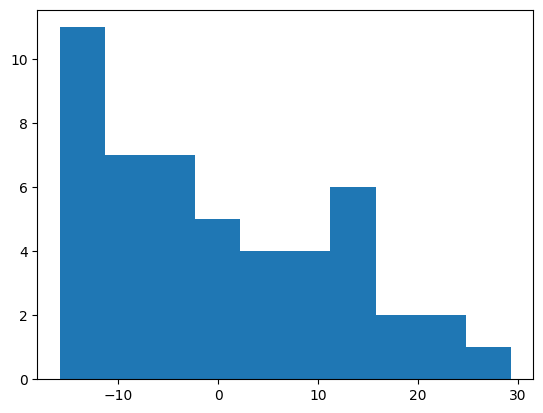

In [13]:
residuals = y - y_pred

print(residuals)

plt.hist(residuals, bins=10)

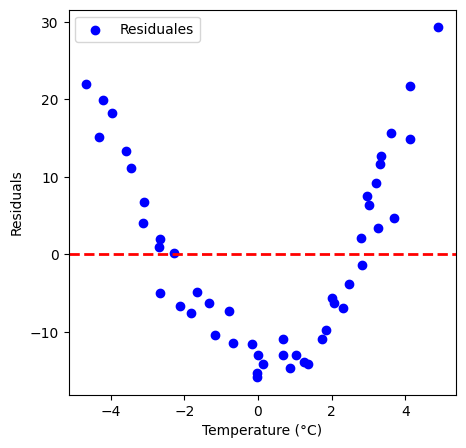

In [14]:
# Graficar los residuales
plt.figure(figsize=(5,5))
plt.scatter(X, residuals, color='blue', label="Residuales")

# Línea horizontal en y=0 para referencia
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)

# Etiquetas de los ejes
plt.xlabel("Temperature (°C)")
plt.ylabel("Residuals")

# Agregar leyenda
plt.legend()

# Mostrar gráfico
plt.show()

In [15]:
# Calcular métricas de error
mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y, y_pred)

# Imprimir resultados
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")

Mean Absolute Error (MAE): 10.329375006275523
Mean Squared Error (MSE): 142.83040442368952
Root Mean Squared Error (RMSE): 11.951167492077479
R² Score: 0.030689536411547258


#### Heteroscedasticity


Breusch-Pagan Test Results:
LM Statistic: 0.22066949786596501
LM p-value: 0.6385302674329969
F Statistic: 0.21262010554340618
F p-value: 0.6468483140419115


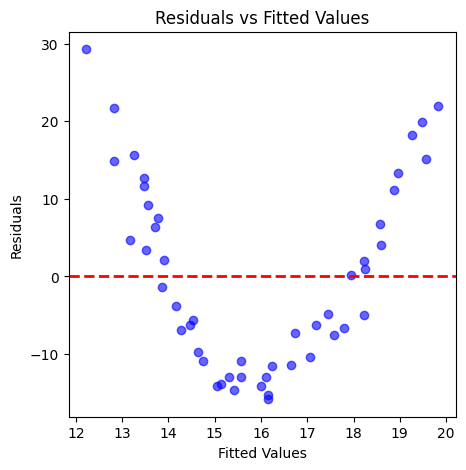

In [22]:
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan

# Agregar una columna de unos para la regresión en statsmodels
X_sm = sm.add_constant(X)

# Ajustar modelo de regresión con statsmodels
model = sm.OLS(y, X_sm).fit()

# Calcular residuos y valores predichos
residuals = y - y_pred
fitted_vals = y_pred

# Test de Breusch-Pagan para heterocedasticidad
bp_test = het_breuschpagan(residuals, X_sm)
labels = ['LM Statistic', 'LM p-value', 'F Statistic', 'F p-value']
bp_results = dict(zip(labels, bp_test))

print("Breusch-Pagan Test Results:")
for key, value in bp_results.items():
    print(f"{key}: {value}")

# Gráfico de residuos vs valores predichos
plt.figure(figsize=(5,5))
plt.scatter(fitted_vals, residuals, color='blue', alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted Values")
plt.show()


#### Lasso & Ridge

In [17]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import cross_val_score

# Aplicar Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X, y)
ridge_r2 = ridge.score(X, y)
ridge_coef = ridge.coef_

# Aplicar Lasso Regression
lasso = Lasso(alpha=1.0)
lasso.fit(X, y)
lasso_r2 = lasso.score(X, y)
lasso_coef = lasso.coef_

print(f"Lasso Regression R²: {lasso_r2}")
print(f"Lasso Coefficients: {lasso_coef}")
print(f"Ridge Regression R²: {ridge_r2}")
print(f"Ridge Coefficients: {ridge_coef}")


Lasso Regression R²: 0.02973757590846593
Lasso Coefficients: [-0.65618327]
Ridge Regression R²: 0.030689286337528765
Ridge Coefficients: [-0.79418358]


## Regresión polinómica

R² (Regresión Polinómica): 0.9321137090423877
MAE: 2.6971548466037953
RMSE: 3.1627868399534123


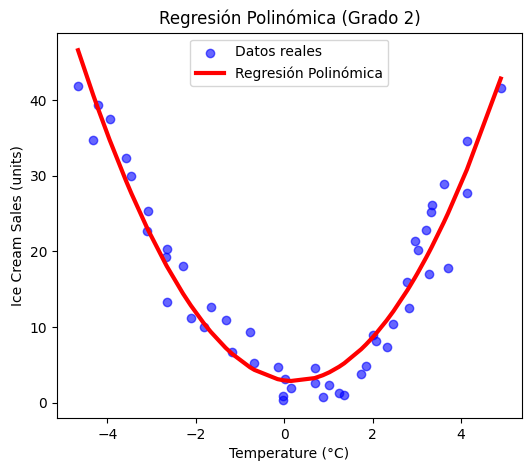

In [23]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Transformar X para incluir términos polinómicos
poly_degree = 2  # Podemos probar con grado 2, y luego aumentar si es necesario
poly_features = PolynomialFeatures(degree=poly_degree)
X_poly = poly_features.fit_transform(X)

# Entrenar el modelo de regresión polinómica
poly_reg = LinearRegression()
poly_reg.fit(X_poly, y)

# Predicciones
y_poly_pred = poly_reg.predict(X_poly)

# Evaluar el modelo
r2_poly = r2_score(y, y_poly_pred)
mae_poly = mean_absolute_error(y, y_poly_pred)
rmse_poly = np.sqrt(mean_squared_error(y, y_poly_pred))

print(f"R² (Regresión Polinómica): {r2_poly}")
print(f"MAE: {mae_poly}")
print(f"RMSE: {rmse_poly}")

# Visualizar los resultados
plt.figure(figsize=(6,5))
plt.scatter(X, y, label="Datos reales", color="blue", alpha=0.6)

# Ordenar valores para una curva suave
X_sorted = np.sort(X, axis=0)
y_poly_sorted = poly_reg.predict(poly_features.transform(X_sorted))

plt.plot(X_sorted, y_poly_sorted, color='red', linewidth=3, label="Regresión Polinómica")
plt.xlabel("Temperature (°C)")
plt.ylabel("Ice Cream Sales (units)")
plt.legend()
plt.title(f"Regresión Polinómica (Grado {poly_degree})")
plt.show()
